CNN classifier for the Fashion-MNIST dataset

In [1]:
#PACKAGE IMPORTS
# Import all required packages.
import pandas as pd
import numpy as np
import tensorflow as tlf
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

from keras.datasets import fashion_mnist
from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers



# If you would like to make further imports from Tensorflow, add them here
#form keras import Sequential, Dense, Flatten, Conv2D, MaxPooling2D

2022-10-18 12:25:51.611524: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 12:25:51.750827: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 12:25:52.302076: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/nkspartan/miniconda3/envs/tf-gpu/lib/
2022-10-18 12:25:52.302136: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfe

Load and preprocess the data


In [2]:
# load the data set from Keras according the dataset description
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [4]:
output_shape = len(np.unique(y_train))
output_shape

10

In [5]:
classes_names = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [7]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

60000 10000
60000 10000


In [8]:
X_train.dtype

dtype('uint8')

In [9]:
y_train.dtype

dtype('uint8')

#### What is the dataset about?
The dataset is about images of clothing and the labels representing the type of clothing

- Number of classes:
  - 10
- Number of samples:
  - 70000 (divided in 60000 train and 10000 test, 14% and 76%)
- Value types:
  - matrix pixel of images (float32) and labels from 0 to 10 (uint8)

First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [10]:
""" This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """

def scale(train_images, test_images):
    train_images = train_images.astype("float32") / 255
    test_images = test_images.astype("float32") / 255

    train_images = np.expand_dims(train_images, -1) # add the third dimension (28, 28, 1)
    test_images = np.expand_dims(test_images, -1)

    return (train_images, test_images)

We have to do data normalization for the images to 0 to 1 value for pixels, because it is easier for computer to work with small numbers, because the bigger the number, the bigger the complexity

In [11]:
# Run your function on the input data

X_train, X_test = scale(X_train, X_test)

In [12]:
input_shape = X_train.shape[1:]
print(input_shape)

(28, 28, 1)


We are now ready to construct a model to fit to the data

In [13]:
""" CREATE a model function
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """

def create_model(shape, output_shape):
    model = Sequential()
    
    model.add(keras.Input(shape=shape))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.01)))

    model.add(Conv2D(32, kernel_size=(3, 3), activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.GaussianNoise(0.1))

    model.add(Flatten())
    model.add(Dense(128, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='elu'))
    model.add(Dense(output_shape, activation='softmax')) # classifier, (10 amount of outputs to classify)

    return model

transfer learning would be a good way to get a high accuracy with this dataset

In [14]:
model = create_model(input_shape, output_shape)

2022-10-18 12:25:54.052080: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 12:25:54.055933: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 12:25:54.056130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 12:25:54.056590: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 gaussian_noise (GaussianNoi  (None, 12, 12, 32)       0         
 se)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               5

- Identify how many learnable parameters does the model have? 
  - 634,474
- How many correspond to the convolutional layers?
  - 19,104
- How many on the FC parameters?
  - 615,370
- Are there no-trainable parameters and why?
  - No, because we don't have an transfer learning models with the option of not training its parameters and we also don't have any layer with constant weights (trainable option == False)


#### Compile the model

You should now compile the model using the `compile` method. To do so, you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [16]:
""" Create a compile function 
This function takes in the model returned from your model function, and compiles it with an optimizer,
   loss function and metric.
   Compile the model using accuracy as the only metric. 
   Your function doesn't need to return anything; the model will be compiled in-place.
    """
def compile_model(loss_func, optimizer, metrics=["sparse_categorical_accuracy", "mean_absolute_error"]):
   model.compile(loss=loss_func, optimizer=optimizer, metrics=metrics)

In [17]:
# Run your compile function

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(learning_rate=1e-3, decay=1e-3 / 200)

compile_model('sparse_categorical_crossentropy', adam)

I used Adam just because from what i read and examples, with Adam you can get better results and it can converge faster. But i have also read that sgd can generalize better so maybe it could be possible to change the design of the model and use sgd instead of adam to get better accuracy and reduce overfitting, but i don't think it would help in this case.

### Fit the model to the training data

In [18]:
""" CREATE YOUR FIT MODEL FUNCTON
    This function should train the model at least for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """

def fit_model(x_values, y_values, validation_data=(X_test, y_test), batch_size=32, epochs=10, callbacks=[]):
    return model.fit(x_values, y_values, validation_data=validation_data, batch_size=batch_size, epochs=epochs, callbacks=callbacks)

In [19]:
import datetime

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                            filepath="checkpoints/cnn_best_weights.hdf5",
                            monitor='val_sparse_categorical_accuracy',
                            verbose=1,
                            save_best_only=True)

date_actual = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + date_actual
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [20]:
# Run your model fit function

history = fit_model(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=[checkpoint_callback])

Epoch 1/20


2022-10-18 12:25:55.783610: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-10-18 12:25:56.193314: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-10-18 12:25:56.194010: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-10-18 12:25:56.194028: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-10-18 12:25:56.194799: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-10-18 12:25:56.194846: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1865/1875 [============================>.] - ETA: 0s - loss: 0.5666 - sparse_categorical_accuracy: 0.8019 - mean_absolute_error: 4.4195
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.86520, saving model to checkpoints/cnn_best_weights.hdf5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5656 - sparse_categorical_accuracy: 0.8023 - mean_absolute_error: 4.4200 - val_loss: 0.3731 - val_sparse_categorical_accuracy: 0.8652 - val_mean_absolute_error: 4.4200
Epoch 2/20
1870/1875 [============================>.] - ETA: 0s - loss: 0.4225 - sparse_categorical_accuracy: 0.8524 - mean_absolute_error: 4.4201
Epoch 2: val_sparse_categorical_accuracy improved from 0.86520 to 0.88200, saving model to checkpoints/cnn_best_weights.hdf5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4224 - sparse_categorical_accuracy: 0.8525 - mean_absolute_error: 4.4200 - val_loss: 0.3335 - val_sparse_categorical_accuracy: 0.8820 - val_mean_absolute_error: 4.4200


#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [21]:
# Run to load the model history into a pandas DataFrame

df_model_history = pd.DataFrame(history.history)
df_model_history

,loss,sparse_categorical_accuracy,mean_absolute_error,val_loss,val_sparse_categorical_accuracy,val_mean_absolute_error
0,0.565574,0.802283,4.420006,0.373136,0.8652,4.419997
1,0.422373,0.852467,4.420010,0.333463,0.8820,4.419997
2,0.377511,0.869967,4.420014,0.312776,0.8920,4.419997
3,0.346465,0.878883,4.420012,0.318508,0.8899,4.419997
4,0.326130,0.885483,4.420002,0.293855,0.8991,4.419997
5,0.314035,0.891233,4.420010,0.304213,0.8952,4.419997
6,0.301801,0.895433,4.420009,0.279097,0.9023,4.419997
7,0.287667,0.899717,4.420007,0.280627,0.9026,4.419997
8,0.278196,0.904233,4.420009,0.278751,0.9059,4.419997
9,0.271323,0.905883,4.420006,0.271473,0.9068,4.419997


In [22]:
df_model_history.shape[0]

20

In [23]:
amount_epochs = np.arange(0, df_model_history.shape[0])

<AxesSubplot: ylabel='mean_absolute_error'>

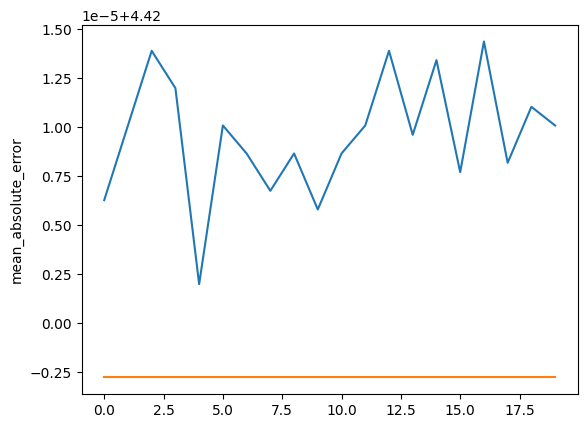

In [24]:
sns.lineplot(data=df_model_history, y="mean_absolute_error", x=amount_epochs)
sns.lineplot(data=df_model_history, y="val_mean_absolute_error", x=amount_epochs)

<AxesSubplot: ylabel='sparse_categorical_accuracy'>

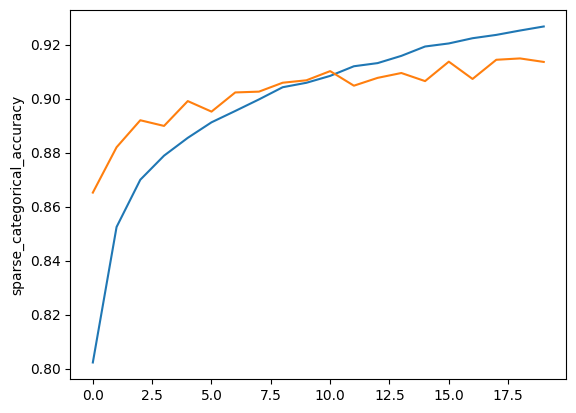

In [25]:
# Run to make the Accuracy vs Epochs plot

sns.lineplot(data=df_model_history, y="sparse_categorical_accuracy", x=amount_epochs)
sns.lineplot(data=df_model_history, y="val_sparse_categorical_accuracy", x=amount_epochs)

<AxesSubplot: ylabel='loss'>

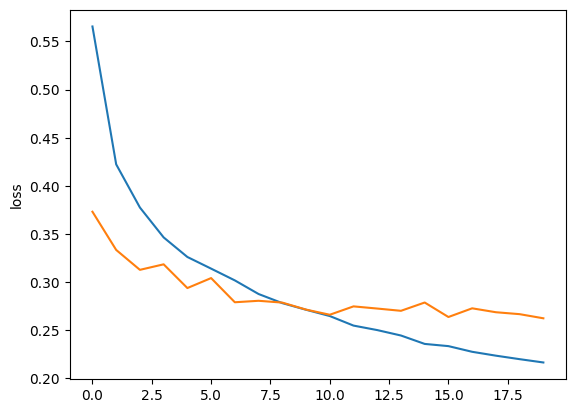

In [26]:
# Run to make the Loss vs Epochs plot
sns.lineplot(data=df_model_history, y="loss", x=amount_epochs)
sns.lineplot(data=df_model_history, y="val_loss", x=amount_epochs)

### Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's evaluate method.

In [27]:
best_model = models.load_model(f'checkpoints/cnn_best_weights.hdf5')

In [28]:
# CREATE A EVALUATION FUNCTION
"""
  This function should evaluate the model on the scaled_test_images and test_labels. 
  Your function should return a tuple (test_loss, test_accuracy).
  """

def evaluate_model(model, x_values, y_values):
  score = model.evaluate(x_values, y_values)
  return score

In [29]:
# Run and print your function to evaluate the model
test_loss, test_accuracy, test_error = evaluate_model(best_model, X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2667 - sparse_categorical_accuracy: 0.9149 - mean_absolute_error: 4.4200


313/313 [==============================] - 0s 862us/step


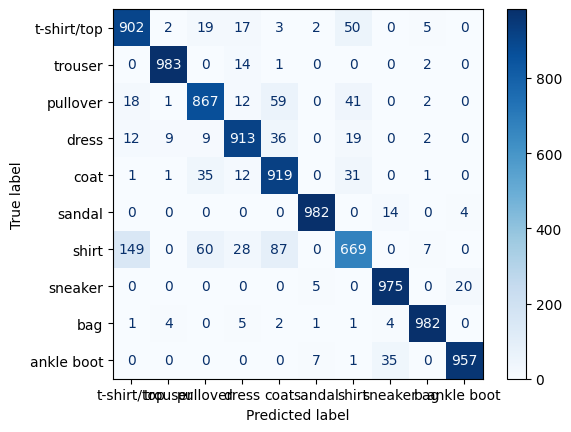

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
y_pred = y_pred.tolist()

cm = confusion_matrix(y_test, y_pred)
cmdis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_names)


cmdis.plot(cmap=plt.cm.Blues)
plt.show()

### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each.

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

In [31]:
# get model predictions on randomly selected test images
indices = np.random.choice(X_test.shape[0], 4)

random_test_images = X_test[indices]
random_test_labels = y_test[indices]

predictions = best_model.predict(x=random_test_images)

1/1 [==============================] - 0s 40ms/step


Plot your predictions 

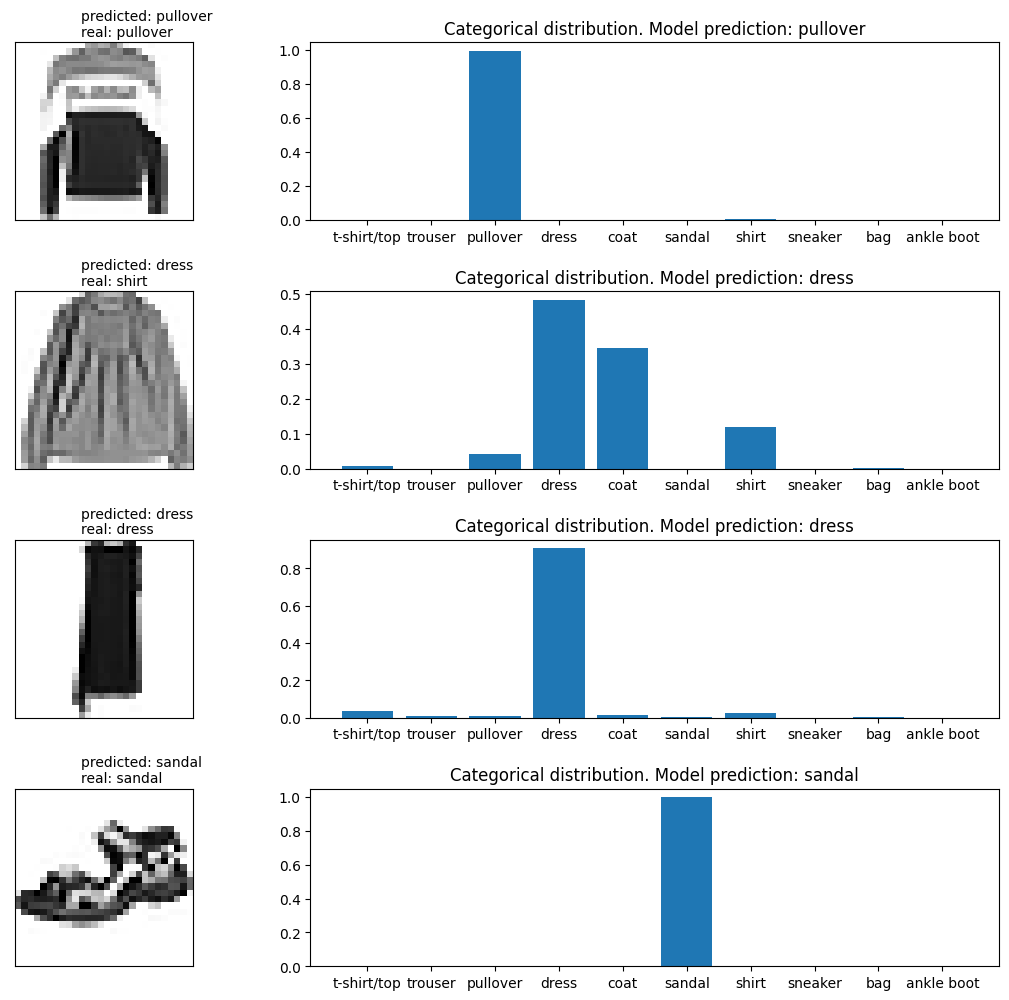

In [32]:
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)): 
    axes[i, 0].imshow(np.squeeze(image), cmap=plt.cm.binary)
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -4, f'predicted: {classes_names[np.argmax(prediction)]}')
    axes[i, 0].text(10., -1.5, f'real: {classes_names[label]}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_xticklabels(classes_names)
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {classes_names[np.argmax(prediction)]}")
    
plt.show()

### Visualize layers

In [33]:
layer_outputs = [layer.output for layer in model.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [ ]:
activations = activation_model.predict(X_test) 
# Returns a list of five Numpy arrays: one array per layer activation

conv2d_7
gaussian_noise_4
conv2d_8
max_pooling2d_4
gaussian_noise_5
flatten_3


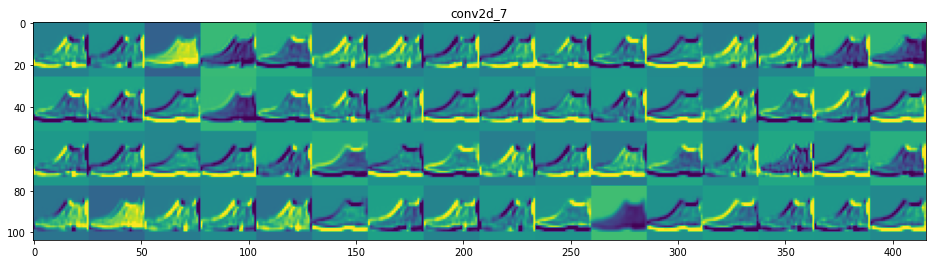

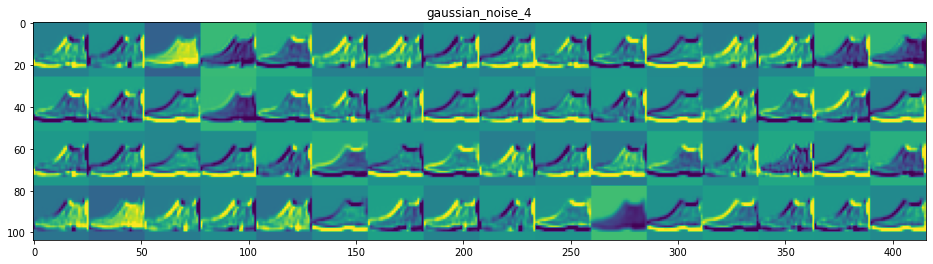

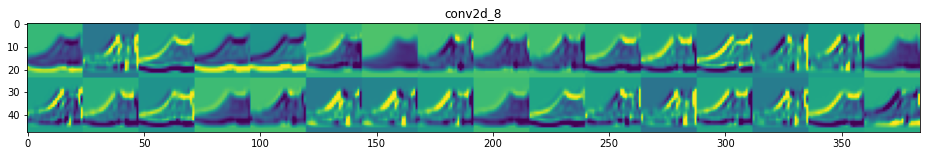

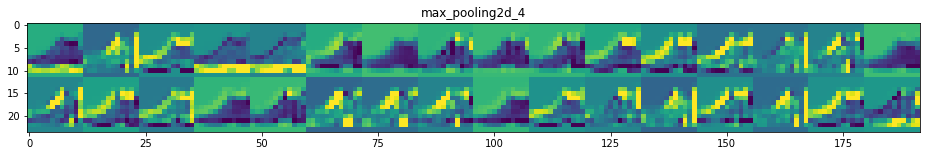

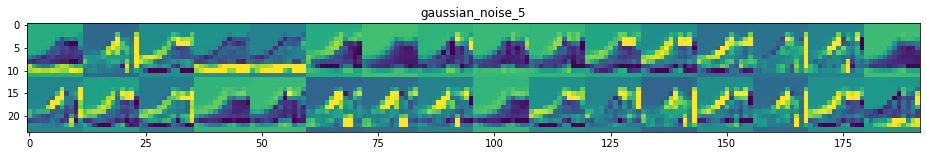

In [ ]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    print(layer_name)
    if ("flatten" in layer_name): break

    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Conclusion

- About hyperparameters, how do they affect the model performance?
  - the hyperparameters and the amount of them can affect in what information we get from the images, what information we can study, overfitting of the data, underfiting of the data, etc.
- Which hyperparameters would you modify to improve the model?
  - I'm not sure because right now the problem is more the ovefitting of the data, because i can get to 97% accuracy but only in the training data if i don't add methods to regularize this, what i could think of is more convolutional layers to try to get more data from the images, but the thing is because the images are to small i don't think you can get a lot more information out of them with this
- What else could you do to improve the performance of the model?
  - Right now one the biggest problem of this model with this dataset is that we get overfitting, i added the gaussian noise, dropout layers and regularization methods to the first convolutional layer to reduce it and it worked, but i could only get to 91% accuracy, so to improve this model we could try transfer learning with resnet or mobilenet, or doing data augmentation to the images to better generalize the model.